**Instructions**

This is a CLOSED book exam for the 2 hours and 30 minutes, and you can only access built-in help (via `help(foo)`). In the FINAL 30 minutes, you will be allowed to refer to notebooks (including homework and midterm exams)  in the BIOS-823-2019 repository ONLY. No other web access is allowed. This is not enough time to search for a solution, but enough so that you are not penalized because you forgot a very specific piece of information.

Once you are in the final 30 mintes, you are free to access the course notebooks, but NOT before that. I will let you know when the time is if you are taking thiis test in class.

You may use any Python standard library module and the 3rd party modules that are imported for you
Do not use any 3rd party module that has not been imported for you

**Note: By taking this exam, you agree to abide by the Duke Honor Code.**

**1**. (20 points) Functional programming, string processing and basic numeric literacy

- Load the standard numpy binary file `nucelotides.npy` into a `numpy` array `xs`. State the number of rows `m` and number of columns `n`. Convert to a list of `m` strings of length `n` each by combining individual nucleotide letters 
- Find the 10 most common overlapping sequence of length 3 among the `m` strings using shifting windows
- Find the longest consecutive sequence of a single nucleotide, and report the string (row number) and (start, end) positions within that string

In [8]:
import numpy as np
import itertools
from collections import Counter
from itertools import groupby

xs=np.load('nucleotides.npy')
m=xs.shape[0] 
n=xs.shape[1]

#Making a list of 100 strings, each string of length 80 nucleotides.
lines=[]
for m in xs:
    string=''
    for letter in m:
        string+=letter
    lines.append(string)

#Creating tokens of length three.
tokens=[]
for line in lines:
    tokenized = ([line[i:i+3] for i in range(0, len(line),1)])
    tokens.append(tokenized)
    
#Making one united list instead of a list of lists.
tokens = list(itertools.chain.from_iterable(tokens))
#Counting ten most frequent sequences.
Counter(tokens).most_common(10)

[('AAA', 464),
 ('ATA', 386),
 ('TAA', 376),
 ('AAT', 375),
 ('TTA', 314),
 ('ATT', 307),
 ('TAT', 307),
 ('AGA', 256),
 ('AAG', 235),
 ('GAA', 226)]

In [9]:
#Find the longest consecutive sequence of a single nucleotide, and report the string (row number) and (start, end) positions within that string
def longest_sequence(line):
#The function returns the longest sequence of the string, a symbol being repeated, and the index from which the sequence started.
    indexes=[sum(1 for nucleotide in sequence) for nucleotide, sequence in groupby(line)] #frequencies of the letters (counted consequtively).
    indexes=np.cumsum(indexes)
    
    current_list=[] 
    repeated_letters_indexes=[] #starting indexes of the consecutive sequence.
    lengths=[] #length of a consecutive sequence.
    
    for index in range(0, len(indexes)-1):
        if indexes[index+1]-indexes[index]==1: #we are not interested in the sequences of length 1.
            pass
        else:
            length=indexes[index+1]-indexes[index] #but keep all sequences of length greater than 1.
            lengths.append(length)
            repeated_letters_indexes.append(indexes[index])
        
    letters=[] #consecutive nucleotide letter.
    for i in repeated_letters_indexes:
        letters.append(line[i])
    
    current_list=list(zip(lengths, letters, repeated_letters_indexes)) #list with the length of a consecutive sequence, 
    #a repeted nucleotide letter and the starting index of a sequence.
    return current_list

list_of_tuples=[]
max_value=1
for index, line in enumerate(lines):
    current_line_tuples = longest_sequence(line)
    desired_list = [[index]+list(tup) for tup in current_line_tuples] #adding an index of a line to each tuple.
    list_of_tuples.append(desired_list)
    
united_list = list(itertools.chain.from_iterable(list_of_tuples))
united_list.sort(key=lambda x: x[1], reverse=True) #sorts by the second (i.e. length of a sequence) element in a tuple.
united_list[0]

[14, 10, 'A', 58]

__Therefore, the longest sequence of 10 'A' nucleotide was detected in line 14 staring from 58 index and endind at the index 67.__

**2**. (20 points) Data manipulation and basic plotting

- Read `TB_burden_age_sex_2019-11-21.csv` into a Pandas DataFrame. Find the sum of TB incidence for a **maximal non-overlapping partition** of age groups using only rows where the value is in (`m`, `f`) across all countries in Europe (EUR). Show the results sorted by age group in ascending order, keeping only `age_group`, `best`, `lo` and `hi` (20 points)
- Make a bar chart of the table showing with `best` as the height and `lo`, `hi` as error bars for each age group using `matplotlib` (5 points)
    - The region a country belongs to can be inferred from the file `TB_notifications_2019-11-21.csv` in the column `g_whoregion`
    - By **maximal non-overlapping partition**, I mean there should be as many age-groups as possible but none of the age-groups should overlap

The final figure should look similar to this
![img](tb.png)

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('TB_burden_age_sex_2019-11-21.csv')
region=pd.read_csv('TB_notifications_2019-11-21.csv')

#Drop 'all' and '15plus' age groups as well as any rows in which sex is not 'm' or 'f'.
df=df[np.logical_or(df['sex']=='m', df['sex']=='f')]
df=df[df['age_group']!='15plus']
df=df[df['age_group']!='0-14']
df=df[df['age_group']!='all']

#Select only European regions.
region=region[region['g_whoregion']=='EUR']
region=region[['country','g_whoregion']]
region=region.drop_duplicates()

#Merge region and df dataframes by country name. Because of the left join we will have NaN values in the non-European region,
#and we will drop those rows.
df=df.merge(region, on='country', how='left')
df=df.dropna(subset=['g_whoregion'])

#Select the columns of interest, group by age and find the sum for each column.
df=df[['age_group', 'best', 'lo','hi']]
df=df.groupby(['age_group']).sum()
df=df.reindex(['0-4', '5-14', '15-24', '25-34','35-44','45-54','55-64','65plus'])

df

,best,lo,hi
age_group,,,
0-4,4475,869.0,8528.0
5-14,7517,1245.0,14800.0
15-24,27151,6708.0,49852.0
25-34,52071,8694.0,101331.0
35-44,57724,8161.0,113851.0
45-54,43089,7942.0,83688.0
55-64,34823,7216.0,65644.0
65plus,31553,8683.0,56641.0


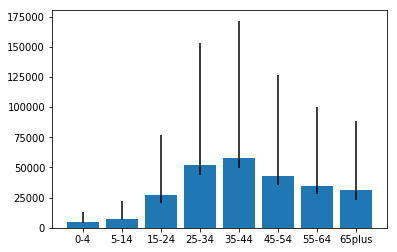

In [11]:
import matplotlib.pyplot as plt
error = [df['lo'], df['hi']]
plt.bar(df.index, df['best'], yerr=error)
plt.show()

**3**. (20 points) Graphs

We have a data set consisting of people who want to travel from country A to country B, and we know the distances from country A and B.  The data set is `'travel.csv'`.

- Find the largest set of countries where travelers could pass a message to each other either directly or via a chain of other travelers, assuming that travelers can freely go from `src` to `dst` in either direction (15 points)
- Show the shortest distance between each country in this set as a DataFrame with countries sorted alphabetically (10 points)

In [12]:
import networkx as nx
travel=pd.read_csv("travel.csv")
subset = travel[['src', 'dst', 'distance']]
edges = [tuple(x) for x in subset.values]

G = nx.Graph()
G.add_weighted_edges_from(edges)
connected_set = sorted(max(nx.connected_components(G), key=len))
connected_set

['Australia',
 'Belgium',
 'Cayman Islands',
 'Czech Republic',
 'Ethiopia',
 'Fiji',
 'France',
 'Haiti',
 'India',
 "Lao People's Democratic Republic",
 'Poland',
 'Saint Barthelemy',
 'Saint Pierre and Miquelon',
 'San Marino',
 'Saudi Arabia',
 'Seychelles',
 'Uganda',
 'Wallis and Futuna']

In [13]:
#Largest set of the countries where travelers could pass a message.
connected_set=pd.DataFrame(connected_set, columns=['src'])
scr=connected_set['src']

In [14]:
#The shortest distance between all countries in a set.
df=pd.DataFrame(list(nx.all_pairs_dijkstra_path_length(G)), columns=['src','path'])
#We're interested only in the countries included to the largest connected block.
connected_set=connected_set.merge(df, on='src', how='left')
countries=connected_set['path'].apply(pd.Series)
countries.index=scr
#Sort the columns alphabetically.
countries = countries.reindex(sorted(countries.columns), axis=1)
countries

,Australia,Belgium,Cayman Islands,Czech Republic,Ethiopia,Fiji,France,Haiti,India,Lao People's Democratic Republic,Poland,Saint Barthelemy,Saint Pierre and Miquelon,San Marino,Saudi Arabia,Seychelles,Uganda,Wallis and Futuna
src,,,,,,,,,,,,,,,,,,
Australia,0,21320,18110,55422,13287,18759,25701,72398,25448,50801,36527,61987,54051,84584,72094,41427,20377,48869
Belgium,21320,0,3210,40522,8033,13505,10801,57498,20194,35901,21627,47087,39151,69684,57194,26527,15123,33969
Cayman Islands,18110,3210,0,37312,4823,10295,7591,54288,16984,32691,18417,43877,35941,66474,53984,23317,11913,30759
Czech Republic,55422,40522,37312,0,42135,47607,29721,16976,54296,8485,18895,19671,11735,29162,29778,23795,49225,6553
Ethiopia,13287,8033,4823,42135,0,5472,12414,59111,12161,37514,23240,48700,40764,71297,58807,28140,7090,35582
Fiji,18759,13505,10295,47607,5472,0,17886,64583,17633,42986,28712,54172,46236,76769,64279,33612,12562,41054
France,25701,10801,7591,29721,12414,17886,0,46697,24575,25100,10826,36286,28350,58883,46393,15726,19504,23168
Haiti,72398,57498,54288,16976,59111,64583,46697,0,71272,25461,35871,36647,28711,12186,46754,40771,66201,23529
India,25448,20194,16984,54296,12161,17633,24575,71272,0,49675,35401,60861,52925,83458,70968,40301,5071,47743


**4**. (20 points)

Geographical coordinates are given as a (latitude, longitude) pair $(\phi, \lambda)$, and hence the difference in latitude and longitude are

$$
\Delta \phi = \phi_2 - \phi_1 \\
\Delta \lambda = \lambda_2 - \lambda_1
$$

For the problem, latitude and longitude are given in degrees. You need to convert to radians by multiplying with the factor $\pi/180$ or use the `radians` function in numpy. Once you have converted to radians, you can calculate an approximate distance using the formula

$$
a = \sin^2 (\Delta \phi/2) + \cos \phi_1 \cos \phi_2 \sin^2 (\Delta \lambda) \\
d = 2 \arcsin(\sqrt{a})
$$

where $%R = 6371$ is the Earth's radius in km.

- Using this formula and the lookup information provided in `worldcities.csv`, calculate the distance from Durham, North Carolina to every other city in the United States (not including itself). Show rows for the 5 cities in the DataFrame closest to Durham.

In [15]:
import math
import numpy as np
import pandas as pd

cities=pd.read_csv('worldcities.csv')
#Convert to radians.
cities['lat_rad'] = (cities['lat']*math.pi)/180
cities['lon_rad'] = (cities['lng']*math.pi)/180

#Latitude and longitude for Durham, NC.
durham_coord=cities[np.logical_and(cities['city']=='Durham', cities['admin_name']=='North Carolina')]
lat_durham=float(durham_coord['lat_rad'])
lon_durham=float(durham_coord['lon_rad'])

In [16]:
def dist(lat, lon):
    R = 6371
    #Function to calculate the distance between Durham, NC and a given city using latitude and longitude
    #(in radians) of that city.
    d_phi=lat_durham - lat
    d_lambda = lon_durham - lon
    a=(np.sin(d_phi/2))**2 + np.cos(lat)*np.cos(lat_durham)*(np.sin(d_lambda))**2
    d = 2* R* np.arcsin(np.sqrt(a))
    return d

In [17]:
dist_list=[]
#Calculate the distance from each city to Durham.
for index, row in cities.iterrows():
    lat = row['lat_rad'] 
    lon = row['lon_rad']
    my_dist=dist(lat, lon)
    dist_list.append(my_dist)
    
cities['dist_from_durham']=dist_list
#Sort by the distance from Durham.
cities = cities.sort_values(by='dist_from_durham')[1:]
cities.head(5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,lat_rad,lon_rad,dist_from_durham
9508,Morrisville,Morrisville,35.8366,-78.8349,United States,US,USA,North Carolina,NaN,26461.0,1840016195,0.625467,-1.375929,20.168550
9460,Chapel Hill,Chapel Hill,35.9269,-79.0390,United States,US,USA,North Carolina,NaN,59862.0,1840016152,0.627043,-1.379491,25.054789
9478,Cary,Cary,35.7814,-78.8167,United States,US,USA,North Carolina,NaN,165904.0,1840016196,0.624503,-1.375611,27.054601
9522,Apex,Apex,35.7248,-78.8659,United States,US,USA,North Carolina,NaN,50451.0,1840015355,0.623515,-1.376470,29.151050
9437,Butner,Butner,36.1285,-78.7502,United States,US,USA,North Carolina,NaN,17394.0,1840022665,0.630561,-1.374450,32.178092


**5**. (20 points)

Create a Spark DataFrame from the `worldcities.csv` via a pandas DataFrame. Find the city in each country with the highest population. Show a table with 3 columns (country, city, population) for the first 5 rows sorted by country name.

- Register the Spark DataFrame as a Spark SQL table. Then find the solution using an SQL query

Hints:

- You should remove any row with NaN in the population columns
- I suggest using a common table expression to create two tables, then joining them to get the required information

In [18]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [19]:
cities=pd.read_csv('worldcities.csv')
cities=cities[['city','country','population']]
cities=cities.dropna(subset=['population'])
df = spark.createDataFrame(cities)
df.createOrReplaceTempView('view')

In [20]:
spark.sql('''
WITH temp AS (
    SELECT DISTINCT (country), max(population) as population FROM view GROUP BY country)
SELECT temp.country, city, temp.population from temp, view WHERE temp.country=view.country AND temp.population=view.population
ORDER BY country
LIMIT (5)
''').show(100)

+--------------+---------+----------+
|       country|     city|population|
+--------------+---------+----------+
|   Afghanistan|    Kabul| 3277000.0|
|       Albania|   Tirana|  895350.0|
|       Algeria|  Algiers| 3354000.0|
|American Samoa|Pago Pago|   12576.0|
|       Andorra|  Andorra|   53998.0|
+--------------+---------+----------+

